#  Exploratory Analysis on which cities has the most volatile markets
### Paul Samaniego

In [14]:
import pandas as pd
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import project1scripts

In [15]:
cwd = os.getcwd()
print(cwd)

C:\Users\Saman\Coolest-project-1


In [16]:
filename = "clean_median_sale_price_v2_df.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,38066700,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,47166700,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,21233300,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,18112500,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,17865000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [17]:
#Author: anderoos
df['StateName'] = df['StateName'].astype('str')
# Define categories
northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
southwest = ['TX', 'OK', 'AR']
# Filters state codes into separate dataframes

def USRegion(value):
    if value in northeast:
        return "northeast"
    elif value in southeast:
        return "southeast"
    elif value in midwest:
        return "midwest"
    elif value in west:
        return "west"
    elif value in southwest:
        return "southwest"



df.insert(loc=0, column = "US Region", value = df["StateName"].apply(USRegion))

df.head()
    

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,northeast,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,west,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,midwest,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,southwest,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,southwest,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [18]:
df_regions_southwest = df[df["US Region"] == "southwest"]
df_regions_southwest.head()

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
3,southwest,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,southwest,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700
23,southwest,"San Antonio, TX",TX,14696700.0,14696700.0,14778300.0,15180000,15731700,16415000,16906700,...,32266700,31600000,31233300,30566700,30600000,30366700,30700000,31066700,31400000,31733300
28,southwest,"Austin, TX",TX,19383300.0,19683300.0,20100000.0,21066700,21766700,22275000,22208300,...,49627700,48294400,46805800,45978100,45311400,45733300,46400000,47400000,48466700,48333300
40,southwest,"Oklahoma City, OK",OK,12263300.0,12306400.0,12656400.0,12891400,13098300,13348300,13683300,...,23933300,23733300,22950000,22383300,22183300,22966700,23750000,24450000,24866700,25283300


In [19]:
#calculating the rolling 12 month average, for the the first 11 months just doing the minimum
southwest_cities_df = df_regions_southwest.drop(columns=["US Region", "StateName"]).set_index("RegionName")
moving_avg_southwest_df = southwest_cities_df.rolling(window=12, axis=1, min_periods=1).mean()
#moving_avg_southeast_df.to_csv("testing.csv")
moving_avg_southwest_df.head()


C:\Users\Saman\AppData\Local\Temp\ipykernel_2092\1180160865.py:3: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  moving_avg_southwest_df = southwest_cities_df.rolling(window=12, axis=1, min_periods=1).mean()


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"Dallas, TX",15166700.0,15191700.0,1.530557e+07,15591675.0,15929340.0,1.624890e+07,1.652239e+07,16721150.0,1.684241e+07,16896090.0,...,3.863982e+07,3.889122e+07,3.903843e+07,3.909321e+07,3.909507e+07,3.905846e+07,3.893762e+07,3.873082e+07,3.852082e+07,3.837082e+07
"Houston, TX",14983300.0,14920250.0,1.496033e+07,15224125.0,15527640.0,1.585470e+07,1.612760e+07,16344775.0,1.647128e+07,16534150.0,...,3.210369e+07,3.225682e+07,3.232244e+07,3.233876e+07,3.231091e+07,3.227195e+07,3.219167e+07,3.210000e+07,3.198612e+07,3.190278e+07
"San Antonio, TX",14696700.0,14696700.0,1.472390e+07,14837925.0,15016680.0,1.524973e+07,1.548644e+07,15657512.5,1.575390e+07,15788010.0,...,3.139352e+07,3.156019e+07,3.167130e+07,3.173519e+07,3.179908e+07,3.181575e+07,3.178519e+07,3.168782e+07,3.154461e+07,3.141528e+07
"Austin, TX",19383300.0,19533300.0,1.972220e+07,20058325.0,20400000.0,2.071250e+07,2.092619e+07,21065625.0,2.113797e+07,21159170.0,...,5.158288e+07,5.173190e+07,5.171658e+07,5.155185e+07,5.124337e+07,5.077977e+07,5.013532e+07,4.937005e+07,4.864950e+07,4.804283e+07
"Oklahoma City, OK",12263300.0,12284850.0,1.240870e+07,12529375.0,12643160.0,1.276068e+07,1.289249e+07,13006962.5,1.306638e+07,13070570.0,...,2.283194e+07,2.300694e+07,2.312222e+07,2.320832e+07,2.326249e+07,2.333472e+07,2.342638e+07,2.350555e+07,2.358750e+07,2.369028e+07


In [20]:
number_of_periods = len(moving_avg_southwest_df.columns)

growth_rate_by_state = pd.DataFrame({
    "Growth Rate":((moving_avg_southwest_df["7/31/2023"] / 
                           moving_avg_southwest_df["1/31/2013"])**(12/number_of_periods)-1)
})

top_3_cities = growth_rate_by_state["Growth Rate"].nlargest(3).index
bottom_3_cities = growth_rate_by_state["Growth Rate"].nsmallest(3).index

cities_to_plot = [item for sublist in [top_3_cities, bottom_3_cities] for item in sublist]

top_bottom_cities = pd.DataFrame({"RegionName":cities_to_plot}).set_index("RegionName")
cities_to_plot
#growth_rate_by_state.head()
#top_bottom_cities.head()

['Athens, TX',
 'Sherman, TX',
 'Fayetteville, AR',
 'Little Rock, AR',
 'Lawton, OK',
 'Pine Bluff, AR']

In [21]:
top_bottom_cities_combined = growth_rate_by_state.merge(moving_avg_southwest_df[["1/31/2013", "7/31/2023"]].div(100), on="RegionName", how="left")
df_to_plot = top_bottom_cities_combined[top_bottom_cities_combined.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
df_to_plot

,Growth Rate,1/31/2013,7/31/2023
RegionName,,,
"Little Rock, AR",0.028186,162633.0,218255.833333
"Fayetteville, AR",0.095067,122333.0,319859.083333
"Sherman, TX",0.101868,97417.0,271960.416667
"Lawton, OK",0.034945,107750.0,154986.083333
"Pine Bluff, AR",0.041356,91000.0,139733.333333
"Athens, TX",0.108450,101667.0,302290.166667


In [22]:
#bars = plt.bar(df_to_plot.index, df_to_plot["7/31/2023"])

#for i, bar in enumerate(bars):
#    growth_rate = df_to_plot['Growth Rate'].iloc[i]
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'{growth_rate:.2%}', ha="center")

#plt.xlabel("City")
#plt.ylabel("Sales in Thousands")

#plt.title("Top 3 / Bottom 3 Midwest Cities")

#plt.grid(True)
#plt.xticks(rotation=45, ha="right")

#plt.tight_layout()
#plt.show()

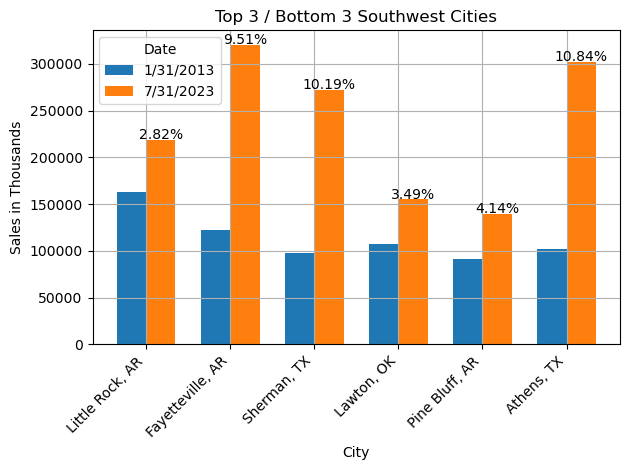

In [23]:
# Extract data
cities = df_to_plot.index
values_1_31_2013 = df_to_plot["1/31/2013"]
values_7_31_2023 = df_to_plot["7/31/2023"]

# Define the width of each bar group
bar_width = 0.35

# Create an array of indices for x-axis positions
x_indices = np.arange(len(cities))

# Create two sets of bars for each city
plt.bar(x_indices - bar_width/2, values_1_31_2013, width=bar_width, label='1/31/2013')
plt.bar(x_indices + bar_width/2, values_7_31_2023, width=bar_width, label='7/31/2023')

# Add labels to the x-axis ticks
plt.xticks(x_indices, cities, rotation=45, ha="right")

# Display the Growth Rate values above each bar
for i, value_7_31_2023 in enumerate(values_7_31_2023):
    growth_rate = df_to_plot['Growth Rate'].iloc[i]
    plt.text(x_indices[i] + bar_width/2, value_7_31_2023 + 1000, f'{growth_rate:.2%}', ha="center")

plt.xlabel("City")
plt.ylabel("Sales in Thousands")
plt.title("Top 3 / Bottom 3 Southwest Cities")

plt.grid(True)
plt.legend(title="Date", loc="best")
plt.tight_layout()
plt.show()

In [24]:
top_bottom_cities_combined_line = top_bottom_cities.merge(moving_avg_southwest_df.div(100), on="RegionName", how="left")
#df_to_plot_line = top_bottom_cities_combined_line[top_bottom_cities_combined_line.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
#df_to_plot_line
top_bottom_cities_combined_line

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"Athens, TX",101667.0,101583.5,104361.333333,109541.75,117583.4,124652.833333,130059.571429,132927.125,133416.666667,131325.0,...,304981.666667,305162.500000,302273.583333,300238.833333,299551.333333,301676.333333,304127.666667,305483.166667,304248.500000,302290.166667
"Sherman, TX",97417.0,93667.0,93222.333333,94083.50,97700.2,100944.666667,103690.714286,105146.000,106463.111111,107300.1,...,274585.500000,276035.500000,276111.416667,274992.916667,273654.333333,271860.583333,271052.916667,270087.583333,270615.333333,271960.416667
"Fayetteville, AR",122333.0,122166.5,122444.333333,124500.00,126733.4,129111.166667,130666.714286,132231.250,132818.555556,133121.7,...,301393.750000,304950.000000,308450.750000,311200.750000,313314.583333,315070.833333,315952.083333,316872.250000,317941.666667,319859.083333
"Little Rock, AR",162633.0,162800.0,163300.000000,164391.75,165796.8,167511.166667,169307.142857,170602.125,171320.444444,171411.7,...,211697.666667,213330.083333,214431.916667,214867.083333,215357.333333,215885.083333,216565.583333,217030.833333,217511.416667,218255.833333
"Lawton, OK",107750.0,108791.5,107194.333333,106312.50,106416.6,107375.000000,110369.000000,113635.375,115879.555556,116223.3,...,151107.000000,151768.083333,152200.083333,152354.250000,152937.583333,153368.166667,154215.333333,154986.166667,155583.333333,154986.083333
"Pine Bluff, AR",91000.0,91333.5,92416.666667,90166.75,88587.8,87243.500000,87098.714286,87045.750,87426.777778,87277.4,...,138701.250000,139779.083333,141488.833333,143141.666667,143933.333333,144336.083333,143172.166667,141466.583333,140080.500000,139733.333333


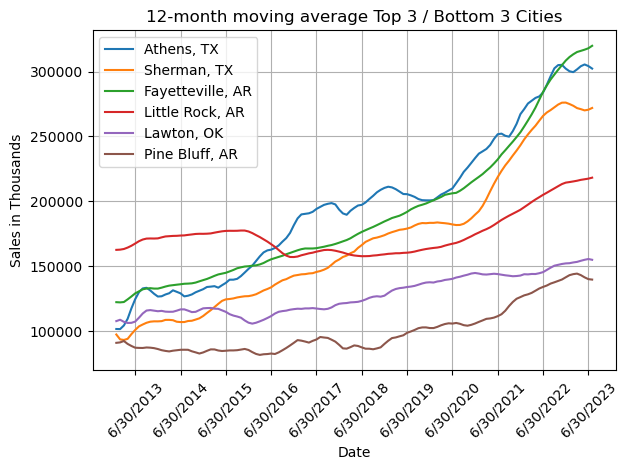

In [25]:
df_transposed = top_bottom_cities_combined_line.transpose()

custom_x_ticks = ["6/30/2013", "6/30/2014", "6/30/2015","6/30/2016", "6/30/2017","6/30/2018",
                  "6/30/2019", "6/30/2020", "6/30/2021", "6/30/2022", "6/30/2023"]

for region in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[region], label=region)

plt.title("12-month moving average Top 3 / Bottom 3 Cities")
plt.xlabel("Date")
plt.ylabel("Sales in Thousands")
plt.legend()
plt.grid(True)
plt.xticks(custom_x_ticks, rotation=45)
plt.tight_layout()
plt.show()